In [60]:
# source
# https://morioh.com/p/f2ef130f3ea0

In [2]:
import numpy as np
import pandas as pd

In [6]:
df_btc = pd.read_csv('BTC_USD_2020-03-02_2020-06-01-CoinDesk.csv')
df_eth = pd.read_csv('ETH_USD_2020-03-02_2020-06-01-CoinDesk.csv')
df_xrp = pd.read_csv('XRP_USD_2020-03-02_2020-06-01-CoinDesk.csv')

In [7]:
df = pd.DataFrame({
    'BTC': df_btc['Closing Price (USD)'],
    'ETH': df_eth['Closing Price (USD)'],
    'XRP': df_xrp['Closing Price (USD)']
})

In [8]:
df.describe()

,BTC,ETH,XRP
count,92.000000,92.000000,92.000000
mean,7823.714661,180.561947,0.193904
std,1347.851697,35.470460,0.023209
min,4944.702336,107.898345,0.138613
25%,6800.101218,143.250970,0.180722
50%,7693.306285,189.429669,0.195629
75%,8995.891470,207.729701,0.206616
max,9917.248414,243.630348,0.243326


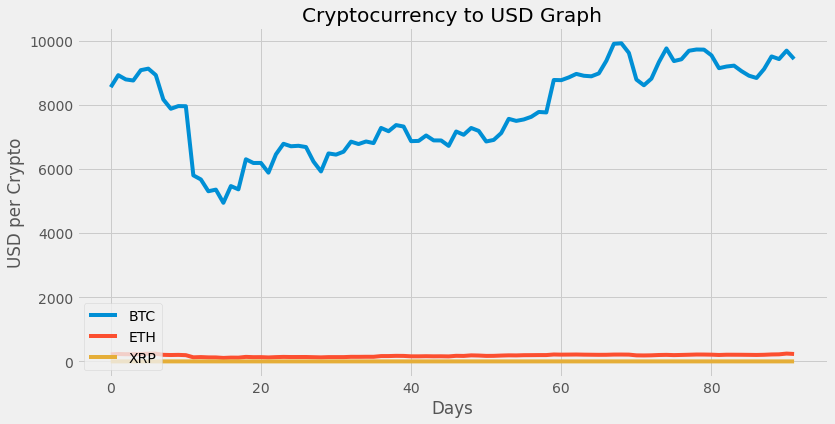

In [41]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
crypto_usd = df
plt.figure(figsize = (12, 6))

for c in crypto_usd.columns.values:
  plt.plot(crypto_usd[c], label = c)

plt.title('Cryptocurrency to USD Graph')
plt.xlabel('Days')
plt.ylabel('USD per Crypto')
plt.legend(crypto_usd.columns.values, loc= 'lower left')
plt.show()

In [42]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df)

In [43]:
df_scale = pd.DataFrame(scaled, columns = df.columns)

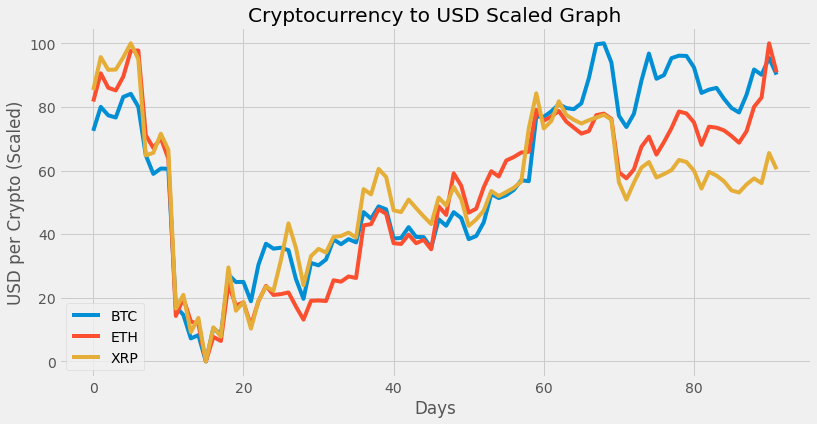

In [44]:
scaled_crypto = df_scale
plt.figure(figsize=(12, 6))

for c in scaled_crypto.columns.values:
  plt.plot(scaled_crypto[c], label=c)

plt.title('Cryptocurrency to USD Scaled Graph')
plt.xlabel('Days')
plt.ylabel('USD per Crypto (Scaled)')
plt.legend(scaled_crypto.columns.values, loc = 'lower left')
plt.show()

In [45]:
DSR = df.pct_change(1)

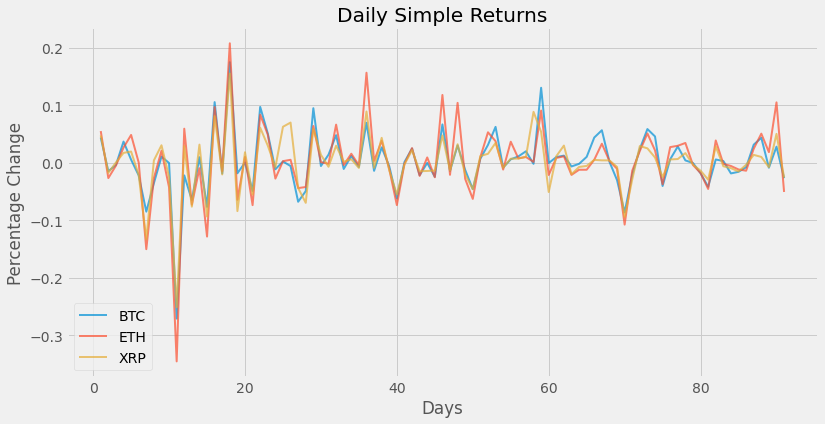

In [50]:
plt.figure(figsize=(12, 6))

for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)

plt.title('Daily Simple Returns')
plt.ylabel('Percentage Change')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'lower left')
plt.show()

In [51]:
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


BTC    0.052025
ETH    0.065152
XRP    0.049862
dtype: float64

In [52]:
DSR.mean()

BTC    0.002479
ETH    0.002885
XRP   -0.000036
dtype: float64

In [53]:
DSR.corr()

,BTC,ETH,XRP
BTC,1.000000,0.916335,0.871581
ETH,0.916335,1.000000,0.917056
XRP,0.871581,0.917056,1.000000


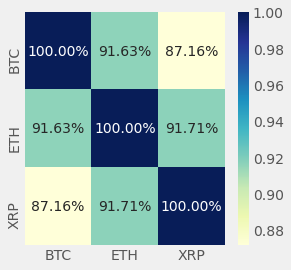

In [57]:
import seaborn as sns
plt.subplots(figsize= (4,4))
sns.heatmap(DSR.corr(), cmap='YlGnBu', annot= True, fmt= '.2%')

In [58]:
DCSR = (DSR+1).cumprod()
DCSR

,BTC,ETH,XRP
0,NaN,NaN,NaN
1,1.043759,1.055011,1.047528
2,1.028327,1.026872,1.029115
3,1.024332,1.021712,1.029495
4,1.061953,1.048618,1.047123
...,...,...,...
87,1.065977,0.942055,0.863613
88,1.112128,0.989671,0.872314
89,1.102508,1.007881,0.865516
90,1.133277,1.113598,0.908958


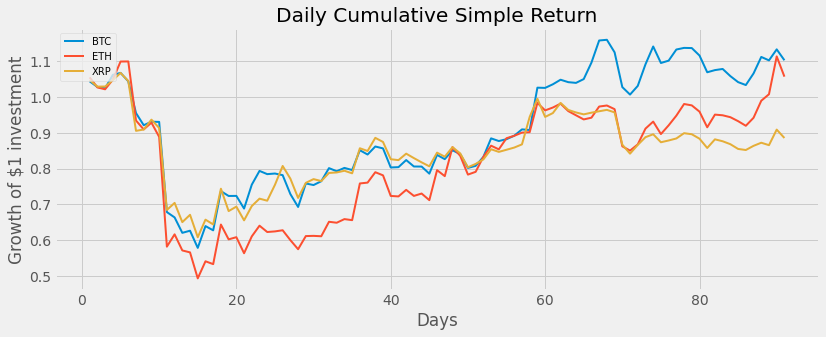

In [59]:
plt.figure(figsize=(12.2, 4.5))

for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)

plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()